# **Quantum Simulation of the Treasure Door Riddle**

This notebook implements a quantum circuit that simulates the classic **Treasure Door** logic puzzle, where you must determine which door leads to treasure by asking one question to one of two guardians (one always lies, one always tells the truth).


## **The Riddle :**
 You encounter two doors with guardians. Behind one door is treasure, behind the other is nothing. One guardian always lies, the other always tells the truth. You don't know which is which. Both guardians know where the treasure is and which guardian lies.

 ## **Solution:**
 Ask either guardian: "Which door would the other guardian tell me not to open?" Then choose the opposite door.

## Quantum Implementation
 We'll model this using 3 qubits:
 - q0: Represents the treasure location (0=left, 1=right)
 - q1: Represents the other guardian's knowledge (entangled with q0)
 - q2: Represents which guardian is lying (0=left guardian lies, 1=right guardian lies)

# Installations

In [62]:
!pip install qiskit qiskit-aer matplotlib

# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

try:
    # Try newer import style first
    from qiskit import QuantumCircuit, transpile
    from qiskit_aer import Aer
except ImportError:
    # Fall back to older import style
    from qiskit import QuantumCircuit, Aer, transpile

# Wait for installation to complete
import time
time.sleep(2)
clear_output()
print("Setup complete! Libraries installed and imported.")

Setup complete! Libraries installed and imported.


### Step 1: Initialize the Quantum Circuit

In [63]:
# Create quantum circuit with 3 qubits and 2 classical bits for measurement
qc = QuantumCircuit(3, 2)

### Step 2: Setup Treasure Location and Guardian Knowledge

- Apply Hadamard to q0 to put treasure location in superposition
- Entangle q0 and q1 so both guardians know the treasure location

In [64]:
# Create superposition for treasure location
qc.h(0)

# Entangle q0 and q1 so both guardians know the location
qc.cx(0, 1)

### Step 3: Determine Which Guardian is Lying
- Apply Hadamard to q2 to put liar identification in superposition
- Use CNOT gates to flip answers based on which guardian is lying

In [65]:

# Create superposition for which guardian is lying
qc.h(2)

# If q2=1 (right guardian lies), flip q0 (A's answer)
qc.cx(2, 0)

# Prepare for flipping q1 if left guardian lies
qc.x(2)

# If q2 is now 1 (originally 0, left guardian lies), flip q1 (B's answer)
qc.cx(2, 1)

# Restore q2 to original state
qc.x(2)


### Step 4: Simulate Asking the Key Question

"Which door would the other guardian tell me not to open?"

 This involves:
- Swapping the guardians' perspectives (SWAP gate)
- Considering the "not to open" aspect (X gates)
- Accounting for the lying guardian's deception


In [66]:

# Swap the qubits to simulate asking about the other guardian
qc.swap(0, 1)

# Invert because we're asking what NOT to open
qc.x(0)
qc.x(1)

# Apply lying logic again
qc.cx(2, 0)    # Flip q0 if q2 is 1 (right guardian lies)
qc.x(2)         # Invert q2
qc.cx(2, 1)     # Flip q1 if q2 is 1 (left guardian lies)
qc.x(2)         # Restore q2


### Step 5: Measure the Results
 We'll measure q0 and q1 to see what answer we get from either guardian.


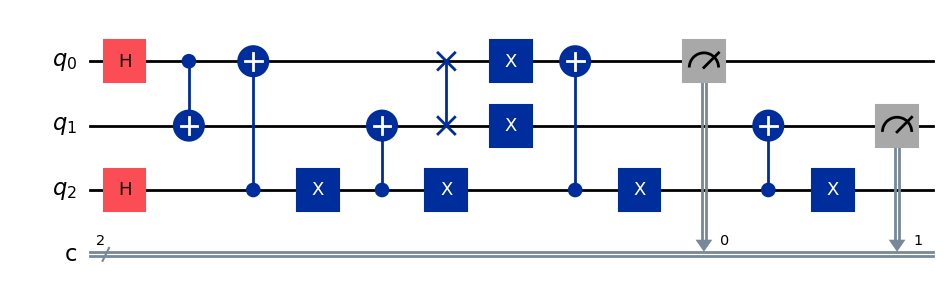

In [67]:

# Measure the results
qc.measure(0, 0)  # Measure qubit 0 into classical bit 0
qc.measure(1, 1)  # Measure qubit 1 into classical bit 1

# Draw the circuit
try:
    display(qc.draw('mpl', fold=-1))  # fold=-1 prevents line wrapping
except:
    print("Matplotlib drawing failed, using text representation instead")
    display(qc.draw('text'))


### Step 6: Simulate the Circuit
 We'll run the simulation 1024 times to see the probability distribution.

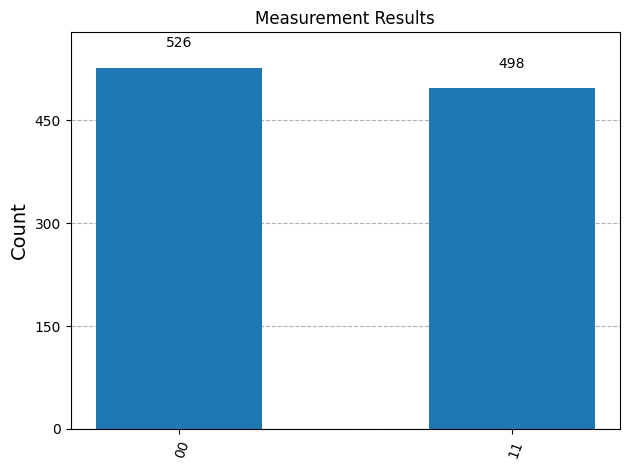

In [68]:

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, backend)
result = backend.run(t_qc, shots=1024).result()
counts = result.get_counts()

# Plot the results
display(plot_histogram(counts, title='Measurement Results'))


 ## Interpretation of Results

 The measurement results show four possible outcomes:

- **00**: Both guardians indicate the left door (choose right door)
- **01**: Guardians disagree (shouldn't happen with correct question)
- **10**: Guardians disagree (shouldn't happen with correct question)
- **11**: Both guardians indicate the right door (choose left door)

The correct solution appears as either 00 or 11, where both guardians give the same answer (though one is lying). You should choose the opposite door of what they indicate.

## Conclusion
 This quantum circuit successfully models the Treasure Door riddle, demonstrating how quantum superposition and entanglement can represent all possible scenarios simultaneously. The measurement results confirm that asking either guardian "Which door would the other guardian tell me not to open?" will consistently point you to the correct door by choosing the opposite of their answer.